In [6]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append('../')

In [2]:
from configs.config import CONF

In [3]:
X = np.load(os.path.join(CONF.PATH.DATASET, "one_dice_default", "one_dice.npy"))
y = np.load(os.path.join(CONF.PATH.DATASET, "one_dice_default", "one_dice_labels.npy"))

X.shape, y.shape

((94900, 10, 10), (94900,))

In [16]:
# サイコロのすべての目をランダムに取得
dice_index = []
for i in range(1, 7):
    indices = np.where(y == i)[0]
    random_index = np.random.choice(indices)
    dice_index.append(random_index)
dice_index

[74975, 56047, 34163, 16369, 33333, 49016]

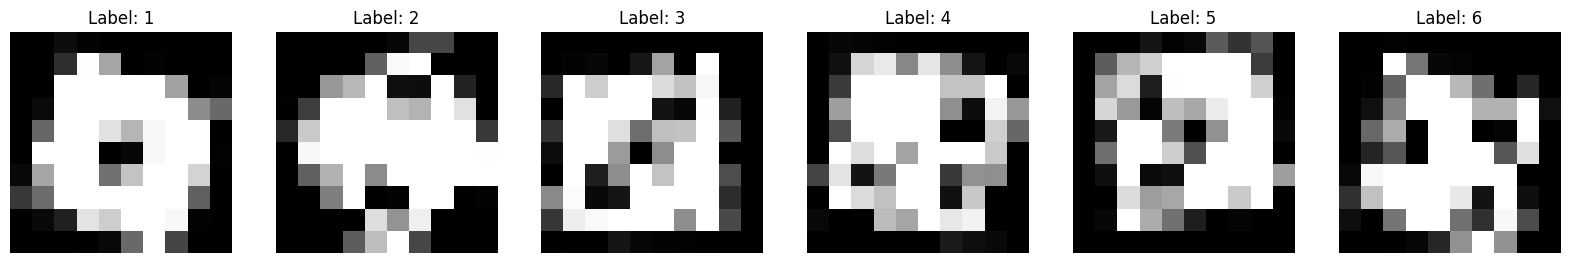

In [18]:
fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for i, dice in enumerate(dice_index):
    axes[i].imshow(X[dice], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {y[dice]}")
plt.show()

In [148]:
def create_three_dices_data(X, y, pattern):
    dice_pattern = np.random.randint(1, 7, size=3)
    label = dice_pattern.sum()
    dice_index = []
    for i in dice_pattern:
        indices = np.where(y == i)[0]
        dice_index.append(np.random.choice(indices))

    data = np.zeros(shape=(20, 20))
    pos = np.random.randint(0, 10)
    if pattern == 0:
        data[0:10, 0:10] = X[dice_index[0]]
        data[0:10, 10:20] = X[dice_index[1]]
        data[10:20, pos:pos+10] = X[dice_index[2]]
    elif pattern == 1:
        data[0:10, pos:pos+10] = X[dice_index[0]]
        data[10:20, 0:10] = X[dice_index[1]]
        data[10:20, 10:20] = X[dice_index[2]]
    elif pattern == 2:
        data[0:10, 0:10] = X[dice_index[0]]
        data[10:20, 0:10] = X[dice_index[1]]
        data[pos:pos+10, 10:20] = X[dice_index[2]]
    elif pattern == 3:
        data[pos:pos+10, 0:10] = X[dice_index[0]]
        data[0:10, 10:20] = X[dice_index[1]]
        data[10:20, 10:20] = X[dice_index[2]]

    return data, label, dice_pattern

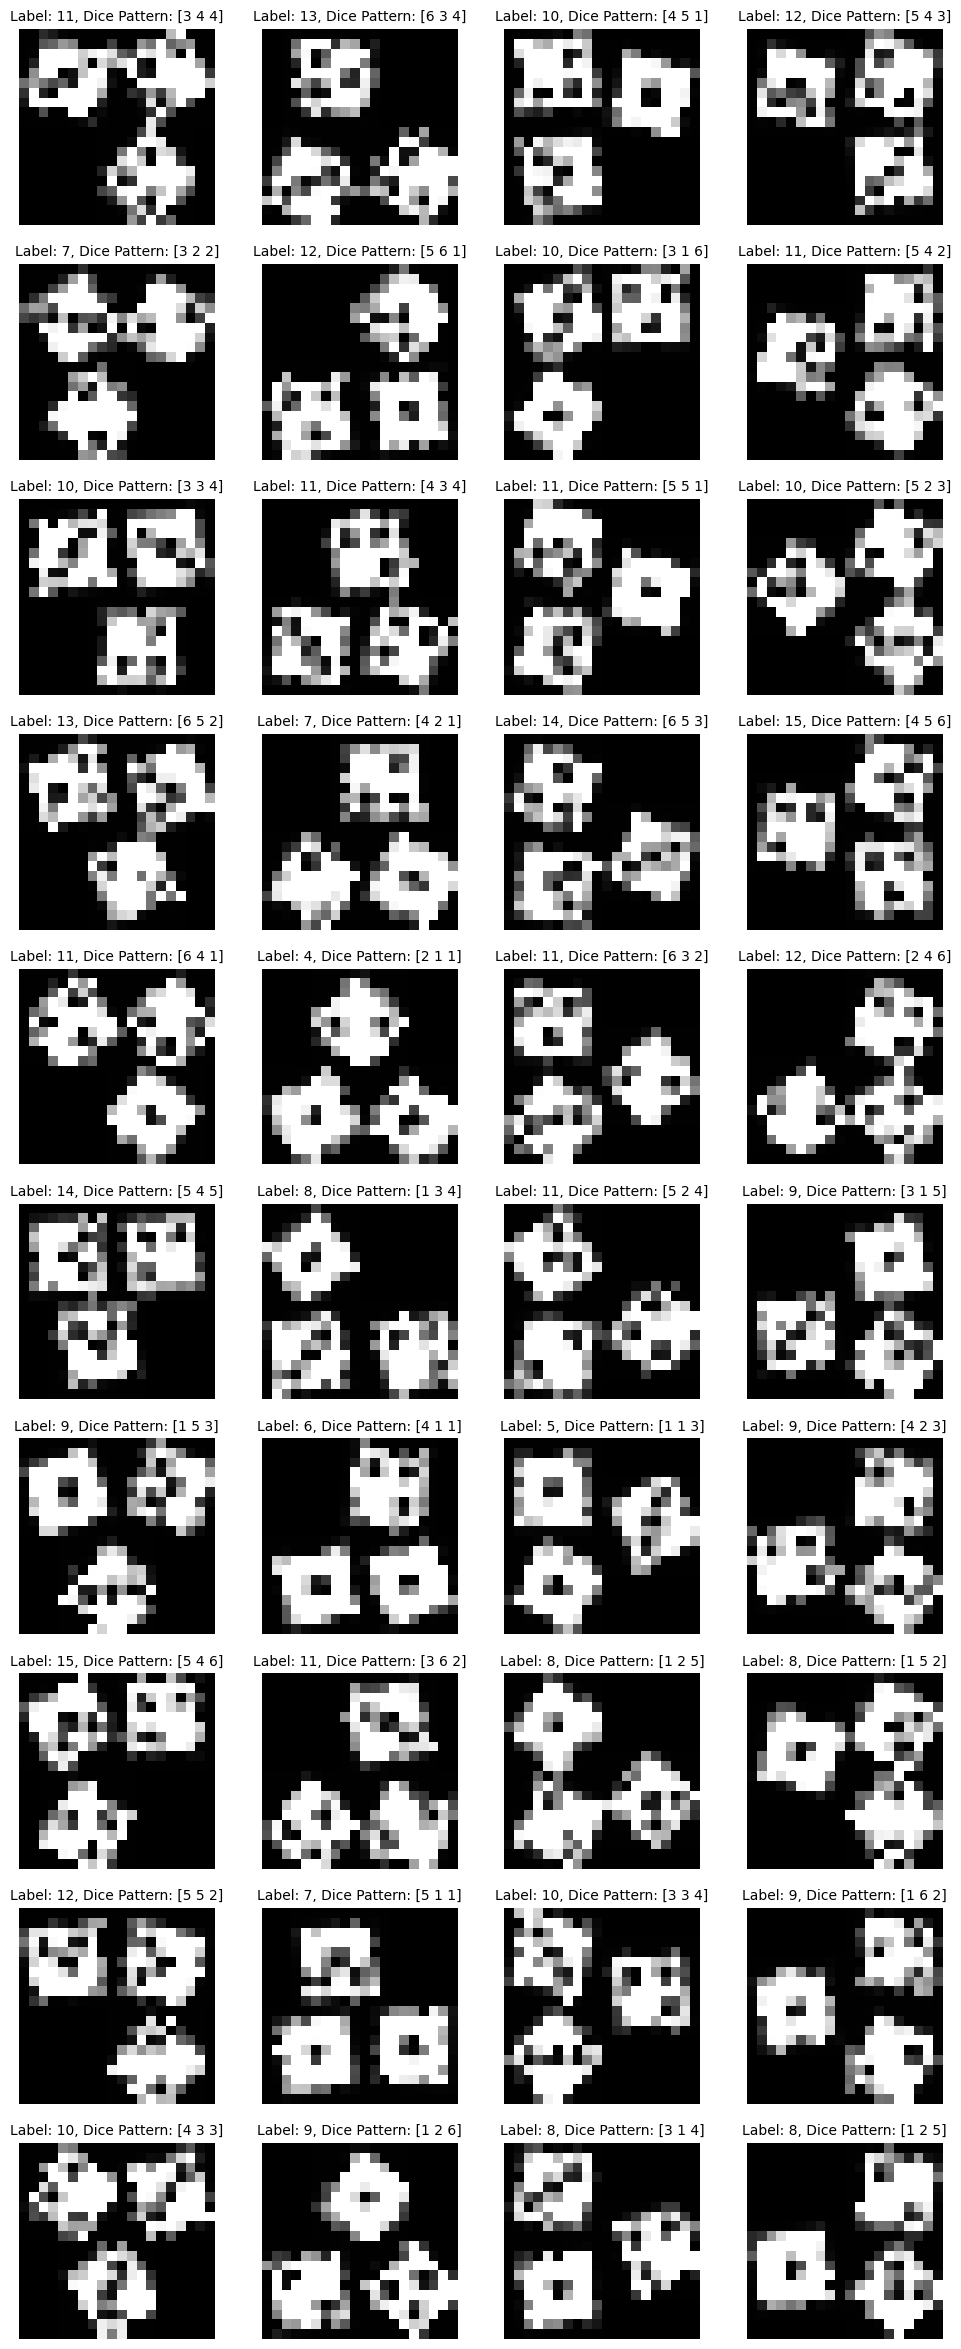

In [149]:
fig, axes = plt.subplots(10, 4, figsize=(12, 30))
for i in range(10):
    for j in range(4):
        data, label, dice_pattern = create_three_dices_data(X, y, pattern=j)

        axes[i,j].imshow(data, cmap='gray')
        axes[i,j].set_title(f"Label: {label}, Dice Pattern: {dice_pattern}", fontsize=10)
        axes[i,j].axis('off')
plt.show()

In [150]:
from tqdm import tqdm

X_data = []
y_data = []
for i in tqdm(range(25000)):
    for j in range(4):
        data, label, dice_pattern = create_three_dices_data(X, y, pattern=j)
        X_data.append(data)
        y_data.append(label)

100%|██████████| 25000/25000 [00:37<00:00, 659.45it/s]


In [151]:
X_data = np.array(X_data)
y_data = np.array(y_data)

X_data.shape, y_data.shape

((100000, 20, 20), (100000,))

In [153]:
X_data = X_data.reshape(-1, 400)
X_data.shape

(100000, 400)

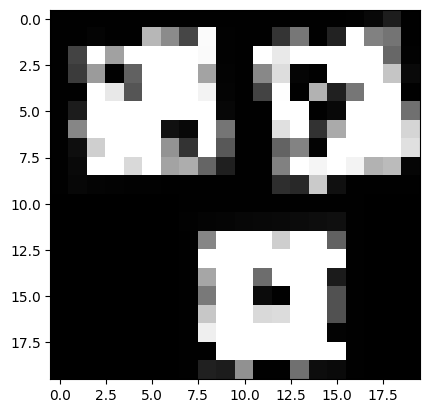

In [155]:
X_data = X_data.reshape(-1, 20, 20)

plt.imshow(X_data[0], cmap='gray')